# Supervised Machine Learning: Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Importing Insurance data set

Kaggle Link (https://www.kaggle.com/mirichoi0218/insurance)

Prediction of charges based on customer information

In [2]:
path = 'https://github.com/JVasquez5/IBM-Machine-Learning-Professional-Certificate/blob/main/Module_2/insurance.csv?raw=true'
df = pd.read_csv(path)
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info() # sex, smoker, and region are categorical values and need to be encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df.nunique() #encoding would convert sex, smoker and region

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
df.isnull().sum() #no missing or NaN values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Distribution of Data

Text(0.5,1,'Distribution of Charges With Log Transformation')

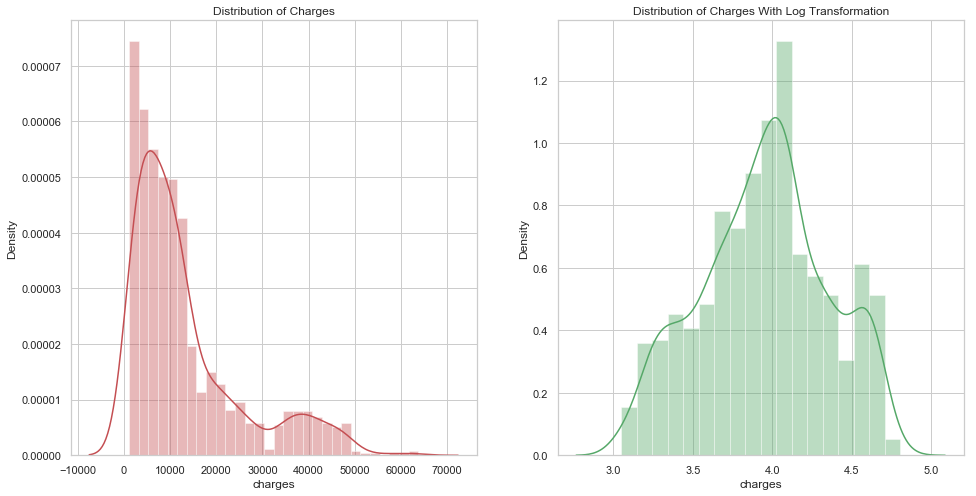

In [7]:
sns.set(style='whitegrid')
f, axes = plt.subplots(1,2, figsize=(16, 8))
sns.distplot(df['charges'], kde = True, color = 'r', ax = axes[0])
# plt.title('Distribution of Charges')
axes[0].set_title('Distribution of Charges')
sns.distplot(np.log10(df['charges']), kde = True, color = 'g' , ax = axes[1])
axes[1].set_title('Distribution of Charges With Log Transformation')

# distribution is slightly right skewed so log-tranformation is needed to be made

Text(0.5,1,'Distribution of Children')

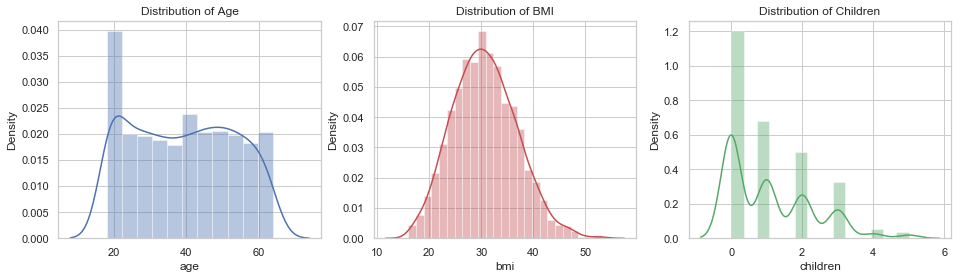

In [8]:
sns.set(style='whitegrid')
f, axes = plt.subplots(1,3, figsize=(16, 4))
sns.distplot(df['age'], kde = True,  color = 'b', ax = axes[0])
sns.distplot(df['bmi'], kde = True, color = 'r', ax = axes[1])
sns.distplot(df['children'], kde = True,  color = 'g', ax = axes[2])

axes[0].set_title('Distribution of Age')
axes[1].set_title('Distribution of BMI')
axes[2].set_title('Distribution of Children')


Text(0.5,1,'Count of Region')

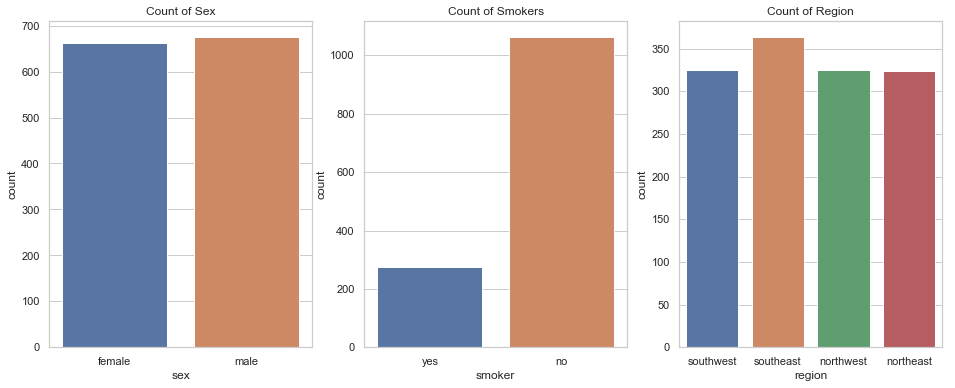

In [9]:
f, axes = plt.subplots(1,3, figsize=(16, 6))
sns.countplot(x="sex",  data=df, ax = axes[0])
sns.countplot(x="smoker",  data=df, ax = axes[1])
sns.countplot(x="region",  data=df, ax = axes[2])

axes[0].set_title('Count of Sex')
axes[1].set_title('Count of Smokers')
axes[2].set_title('Count of Region')

## Feature Engineering
1) Converting category labels into numerical using LabelEncoder

2) scaling Age and BMI

3) Final df with Log-transformed target


In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())

df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())

df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())

df.region = label.transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale = ['age', 'bmi']

In [12]:
features = df.drop(labels='charges', axis=1)
charges = np.log10(df['charges']).to_frame()
new_df = pd.concat([features, charges], axis =1)
new_df[scale] = scaler.fit_transform(new_df[scale])
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,3,4.227499
1,0.000000,1,0.479150,1,0,2,3.236928
2,0.217391,1,0.458434,3,0,2,3.648308
3,0.326087,1,0.181464,0,0,1,4.342116
4,0.304348,1,0.347592,0,0,1,3.587358


# Linear Regression

In [13]:
''' 
train-test split
kf
vanilla/lasso/ridge/polynomial
error comparison
'''

' \ntrain-test split\nkf\nvanilla/lasso/ridge/polynomial\nerror comparison\n'

In [14]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(features, charges, test_size=0.30, random_state=42)
kf = KFold(shuffle=True, random_state=42, n_splits=3)

## Vanilla LR

In [16]:
s = StandardScaler()
lr = LinearRegression()
estimator = Pipeline([("scaler", s),("regression", lr)])
predictions_linear = cross_val_predict(estimator, X_train, Y_train, cv=kf)
linear_score = r2_score(Y_train, predictions_linear)


linear_score

0.755642152605387

In [17]:
estimator.fit( X_train, Y_train)
linear_scoretest = estimator.score( X_test, Y_test)
linear_scoretest

0.7838021842960895

## Lasso

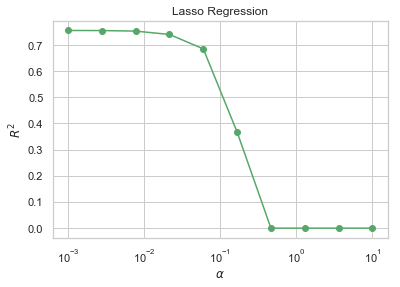

In [18]:
alphas = np.geomspace(0.001, 10.0, 10)
lasso_scores = []
predictions_lasso = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([("scaler", s),("lasso_regression", las)])

    predictions_lasso = cross_val_predict(estimator, X_train, Y_train, cv = kf)
    
    score = r2_score(Y_train, predictions_lasso)
    
    lasso_scores.append(score)
    
plt.semilogx(alphas, lasso_scores, '-o', color='g')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [19]:
best_lasso = Pipeline([("scaler", s),("lasso_regression", Lasso(alpha=0.001, max_iter=100000))])
best_lasso.fit(X_train, Y_train)
lasso_score = best_lasso.score(X_train, Y_train)
lasso_score

0.7595491855180481

In [20]:
lasso_scoretest=best_lasso.score(X_test,Y_test)
lasso_scoretest

0.7836557427341876

## Ridge

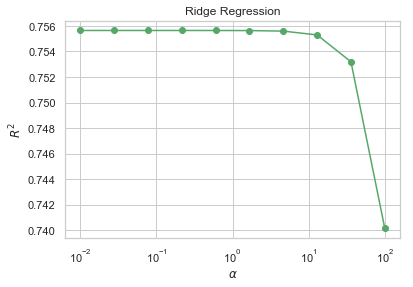

In [21]:
ridge_scores = []
predictions_ridge = []
alphas = np.geomspace(0.01, 100.0, 10)

for alpha in alphas:
    rid = Ridge(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([("scaler", s),("ridge_regression", rid)])

    predictions_ridge = cross_val_predict(estimator, X_train, Y_train, cv = kf)
    
    score = r2_score(Y_train, predictions_ridge)
    
    ridge_scores.append(score)
    
plt.semilogx(alphas, ridge_scores, '-o', color='g')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [22]:
best_ridge = Pipeline([("scaler", s),("ridge_regression", Ridge(alpha=0.1))])
best_ridge.fit(X_train, Y_train)
ridge_score = best_ridge.score(X_train, Y_train)
ridge_score

0.7595887889329956

In [23]:
ridge_scoretest = best_ridge.score(X_test, Y_test)
ridge_scoretest

0.7838013864632076

## Polynomial Vanilla

In [24]:
pf = PolynomialFeatures(degree=3)

estimatorpoly = Pipeline([("scaler", s),("polynomial_features", pf),("regression", lr)])
predictions_linearpoly = cross_val_predict(estimatorpoly, X_train, Y_train, cv=kf)
linearpoly_score = r2_score(Y_train, predictions_linearpoly)

linearpoly_score

0.8213032938950083

In [25]:
estimatorpoly.fit( X_train, Y_train)
linearpoly_scoretest = estimatorpoly.score( X_test, Y_test)
linearpoly_scoretest

0.8388780913219194

## Polynomial Lasso

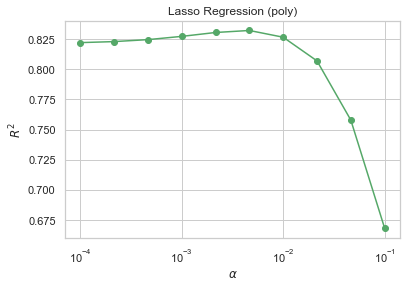

In [26]:
alphas = np.geomspace(0.0001, 0.1, 10)
lasso_scores = []
predictions_lasso = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([("scaler", s),("polynomial_features", pf),("lasso_regression", las)])

    predictions_lasso = cross_val_predict(estimator, X_train, Y_train, cv = kf)
    
    score = r2_score(Y_train, predictions_lasso)
    
    lasso_scores.append(score)
    
plt.semilogx(alphas, lasso_scores, '-o', color='g')
plt.title('Lasso Regression (poly)')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [27]:
best_lassopoly = Pipeline([("scaler", s),("polynomial_features", pf),("lasso_regression", Lasso(alpha=0.003, max_iter=100000))])
best_lassopoly.fit(X_train, Y_train)
lassopoly_score = best_lassopoly.score(X_train, Y_train)
lassopoly_score

0.8475177335717102

In [28]:
lassopoly_scoretest = best_lassopoly.score(X_test, Y_test)
lassopoly_scoretest

0.8430941232553201

## Polynomial Ridge

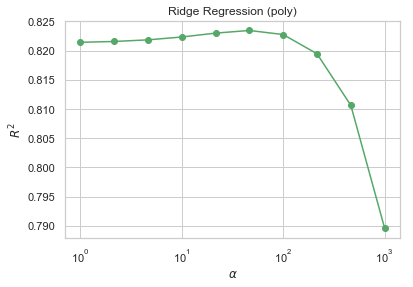

In [29]:
ridge_scores = []
predictions_ridge = []
alphas = np.geomspace(1, 1000.0, 10)

for alpha in alphas:
    rid = Ridge(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([("scaler", s),("polynomial_features", pf),("ridge_regression", rid)])

    predictions_ridge = cross_val_predict(estimator, X_train, Y_train, cv = kf)
    
    score = r2_score(Y_train, predictions_ridge)
    
    ridge_scores.append(score)
    
plt.semilogx(alphas, ridge_scores, '-o', color='g')
plt.title('Ridge Regression (poly)')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [30]:
best_ridgepoly = Pipeline([("scaler", s),("polynomial_features", pf),("ridge_regression", Ridge(alpha=60))])
best_ridgepoly.fit(X_train, Y_train)
ridgepoly_score = best_ridgepoly.score(X_train, Y_train)
ridgepoly_score


0.8495318243109622

In [31]:
ridgepoly_scoretest = best_ridgepoly.score(X_test, Y_test)
ridgepoly_scoretest

0.8385514391123394

## Summary of scores

In [32]:
score_data = np.array([[linear_score, lasso_score, ridge_score],[linearpoly_score, lassopoly_score, ridgepoly_score]])

model_summary = pd.DataFrame(data=score_data,columns=['linear', 'lasso', 'ridge'], index=['without polynomial degree','with polynomial degree = 3'])
model_summary

,linear,lasso,ridge
without polynomial degree,0.755642,0.759549,0.759589
with polynomial degree = 3,0.821303,0.847518,0.849532


Polynomial returns better results but this could be due to overfitting too. Regularization is better both with and without polynomial features.

## Test Score Summary

In [33]:
score_datatest = np.array([[linear_scoretest, lasso_scoretest, ridge_scoretest],[linearpoly_scoretest, lassopoly_scoretest, ridgepoly_scoretest]])

model_summarytest = pd.DataFrame(data=score_datatest,columns=['linear', 'lasso', 'ridge'], index=['without polynomial degree','with polynomial degree = 3'])
model_summarytest

,linear,lasso,ridge
without polynomial degree,0.783802,0.783656,0.783801
with polynomial degree = 3,0.838878,0.843094,0.838551


## Actual vs Test Predictions
#### With inverse-log (exponential) transformation of target values

[Text(0,0.5,'Predicted'),
 Text(0.5,0,'Actual'),
 Text(0.5,1,'Linear Regression Results')]

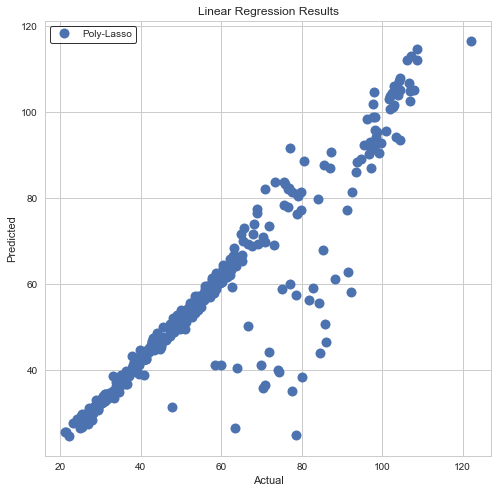

In [37]:
f= plt.figure(figsize=(8,8))
ax = plt.axes()

# labels, models = ['Linear', 'Ridge', 'Lasso', 'Polynomial','Poly-Ridge','Poly-Lasso'],[estimator, best_ridge, best_lasso, estimatorpoly,best_ridgepoly,best_lassopoly]

# for mod, label in zip(models, labels):
ax.plot(np.exp(Y_test), np.exp(best_lassopoly.predict(X_test)), marker='o', ls='', ms=10.0, label='Poly-Lasso', alpha=1)
    
    
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual', ylabel='Predicted', title='Linear Regression Results')